<a href="https://colab.research.google.com/github/rbondili/Ecommerce_E2E_MLProject/blob/master/03_NLP_Feature_extraction_%26_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3) Product categories

Products are uniquely identified through the `StockCode` variable. A shrort description of the products is given in the `Description` variable.

In this section, we use the content of the variable `Description` to group the products into different categories.

We extract keywords from `Description` with the function below.

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
relative_path = '/content/drive/My Drive/Colab Notebooks/Customer Segmentation/ecommerce-data/'

df_dropna = pd.read_csv(relative_path + 'data_dropna.csv', encoding='latin', dtype={'CustomerID': str}) 
df_cleaned = pd.read_csv(relative_path + 'data_cleaned.csv', encoding='latin', dtype={'CustomerID': str}) 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


This function takes the dataframe and analyzes the content of the `Description` column by performing the following operations:

* extract the names (proper, common) appearing in the products description
* for each name, extract the root of the word and aggregate the set of names associated with this particular root
* count the number of times each root appears in the dataframe
* when several words are listed for the same root, we consider that the keyword associated with this root is the shortest one (this systematically selects the singular when there are singular/plural variants)

In [ ]:

# The function to extract keywords from (unique) Descriptions
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, colonne = 'Description'):
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in dataframe[colonne]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
        
        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            if racine in keywords_roots:                
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1                
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    print("Nb of keywords in variable '{}': {}".format(colonne,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


## 3.1) Unique descriptions
**Task**: extract unique descriptions. How many of them we have?
Use keywords_invertory function.

In [ ]:
df_produits = pd.DataFrame(df_dropna['Description'].unique()).rename(columns = {0:'Description'})
print("number of different descriptions is:", len(df_produits))

number of different descriptions is: 3896


In [ ]:
# use the function
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_produits)
print(keywords,'\n', keywords_roots,'\n',  keywords_select,'\n',  count_keywords)

Nb of keywords in variable 'Description': 1483
['heart', 'holder', 'metal', 'lantern', 'cream', 'cupid', 'coat', 'hanger', 'union', 'flag', 'water', 'bottle', 'nest', 'box', 'glass', 'star', 'hand', 'jack', 'warmer', 'dot', 'bird', 'ornament', 'poppy', 'playhouse', 'bedroom', 'kitchen', 'feltcraft', 'princess', 'charlotte', 'doll', 'ivory', 'cosy', 'colour', 'teaspoons', 'vintage', 'jigsaw', 'block', 'alphabet', 'home', 'building', 'word', 'love', 'recipe', 'england', 'jam', 'jar', 'rack', 'paris', 'fashion', 'bath', 'alarm', 'clock', 'bakelike', 'pink', 'green', 'panda', 'bunny', 'sheet', 'tape', 'globe', 'head', 'tail', 'game', 'set/2', 'retrospot', 'tea', 'towel', 'round', 'snack', 'woodland', 'spaceboy', 'lunch', 'i', 'london', 'circus', 'bag', 'design', 'toadstool', 'night', 'light', 'seaside', 'puzzles', 'mini', 'parade', 'paint', 'postage', 'paper', 'chain', 'christmas', 'parasol', 'coffee', 'mug', 'planet', 'billboard', 'love/hate', 'wood', 'drawer', 'cabinet', 'finish', 's/3',

## 3.2) Dictionary to list convert the `count_keywords` dictionary into a list, to sort the keywords according to their occurences, show the 5 most common

In [ ]:
# turn the dict into a list and sort by nb of occurrences
list_products = []

for key, value in count_keywords.items():
    list_products.append([key,value])

In [ ]:
list_products.sort(key = lambda x: x[1], reverse=True)

In [ ]:
list_products[0:5]

[['heart', 267], ['vintag', 211], ['set', 206], ['pink', 189], ['bag', 165]]

## 3.3) Plot the words

In [ ]:
most_common = list_products[0:25]

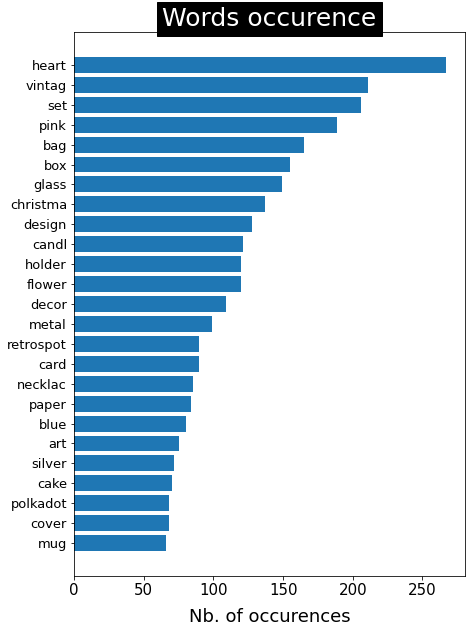

In [ ]:
import matplotlib.pyplot as plt
liste = list_products
N_words = 25
#
plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(7, 10))
y_axis = [i[1] for i in liste[:N_words]]
x_axis = [k for k,i in enumerate(liste[:N_words])]
x_label = [i[0] for i in liste[:N_words]]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.yticks(x_axis, x_label)
plt.xlabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax.barh(x_axis, y_axis, align = 'center')
ax = plt.gca()
ax.invert_yaxis()
#
plt.title("Words occurence", bbox={'facecolor':'k', 'pad':5}, color='w',fontsize = 25)
plt.show()

## 3.4) Remove urrelevant words
There are about 1480 keywords, but some of them are useless like colors. That's why we discard keywords which are too short (less than 3 charaters), colors, occur less than 13 times, or contain '+', '/'. 

In [ ]:
!pip install colour

In [ ]:
from colour import Color
def check_color(color):
    try:
        Color(color)
        return True
    except ValueError:
        return False

In [ ]:
relevant_words = [x for x in list_products if x[1] > 12]
relevant_words = [x for x in relevant_words if len(x[0]) > 2]
relevant_words = [word for word in relevant_words if not check_color(word[0])] 
relevant_words = [word for word in relevant_words if not ('+' in word[0]) or ('/' in word[0])] 
len(relevant_words)

192

## 3.5) Encoding of words
Define a matrix `X` with 192 columns - 192 key words above as categories rows correspond to items of unique_products (unique descriptions of the cleaned data): 
For each unique description (you should have 3878 of them) and for each 192 of key words you need to get 0 or 1: is this word in this description or not.


In [ ]:
df_produits.head()

,Description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.


In [ ]:
unique_products = df_cleaned['Description'].unique()
X = pd.DataFrame()
for key, occurence in relevant_words:
    X.loc[:, key] = list(map(lambda x:int(key.upper() in x), unique_products))
print(X.shape)
X.head()

(3878, 192)


,heart,vintag,set,bag,box,glass,christma,design,candl,holder,flower,decor,metal,retrospot,card,necklac,paper,art,cake,polkadot,cover,mug,tin,wrap,sign,pack,egg,bracelet,star,bowl,mini,tea,garden,wall,ivori,cushion,frame,mirror,cream,home,...,doili,biscuit,regenc,hen,jigsaw,rack,coaster,money,cottag,incens,crystal,tag,medium,dish,imag,pictur,wooden,piec,bathroom,girl,fruit,child,pan,food,orbit,alphabet,toadstool,time,milk,funki,tidi,plant,diner,hous,squar,craft,lace,jewel,wallet,point
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 3.6) Range of UnitPrice feature
We want to add new feature: how expensive is one unit of our stock. We want to make several features: price in regions: $[0,1], [1,2], [2,3], [3,5], [5,10], [10,\infty)$


In [ ]:
len(df_cleaned['Description'].unique())

3878

In [ ]:
# add price ranges
threshold = [0, 1, 2, 3, 5, 10]
label_col = []

#create column with names 0<.<1, 1<.<2, ...   5<.10, .>10
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])
    label_col.append(col)
    X.loc[:, col] = 0

#use average price for each product decrciption.
for i, prod in enumerate(unique_products):
  price = df_cleaned[ df_cleaned['Description'] == prod]['UnitPrice'].mean()
  j = 0
  while price > threshold[j]:
      j+=1
      if j == len(threshold): break
  X.loc[i, label_col[j-1]] = 1

# You X shoud have 198 columns now

X.head()

,heart,vintag,set,bag,box,glass,christma,design,candl,holder,flower,decor,metal,retrospot,card,necklac,paper,art,cake,polkadot,cover,mug,tin,wrap,sign,pack,egg,bracelet,star,bowl,mini,tea,garden,wall,ivori,cushion,frame,mirror,cream,home,...,coaster,money,cottag,incens,crystal,tag,medium,dish,imag,pictur,wooden,piec,bathroom,girl,fruit,child,pan,food,orbit,alphabet,toadstool,time,milk,funki,tidi,plant,diner,hous,squar,craft,lace,jewel,wallet,point,0<.<1,1<.<2,2<.<3,3<.<5,5<.<10,.>10
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## 3.7) Number of products for each price range


In [ ]:
print("{:<8} {:<20} \n".format('range', 'number of products') + 30*'-')
for i in range(len(threshold)):   
    print("{:<10}  {:<20}".format(label_col[i], X.loc[:, label_col[i]].sum()))

range    number of products   
------------------------------
0<.<1       964                 
1<.<2       1009                
2<.<3       673                 
3<.<5       606                 
5<.<10      470                 
.>10        156                 


##3.8) Creating clusters of products

In this section, we group the products into different classes. 

In the case of matrices with binary encoding, the most suitable metric for the calculation of distances is the Hamming distance. 

Here we simply use Euclidean distance with kmeans. To choose approximately the number of clusters that best describes the data, we use the silhouette score:

In [ ]:
(df_cleaned.iloc[:, [5, 7, 10, 11]]).values

array([[ 6.  ,  2.55,  0.  , 15.3 ],
       [ 6.  ,  3.39,  0.  , 20.34],
       [ 8.  ,  2.75,  0.  , 22.  ],
       ...,
       [ 4.  ,  4.15,  0.  , 16.6 ],
       [ 4.  ,  4.15,  0.  , 16.6 ],
       [ 3.  ,  4.95,  0.  , 14.85]])

For n_clusters = 3 The average silhouette_score is : 0.10301467233615781
For n_clusters = 4 The average silhouette_score is : 0.1288457481525637
For n_clusters = 5 The average silhouette_score is : 0.1497905203267311
For n_clusters = 6 The average silhouette_score is : 0.14789088282015717
For n_clusters = 7 The average silhouette_score is : 0.1522914550428206
For n_clusters = 8 The average silhouette_score is : 0.1518707585435695
For n_clusters = 9 The average silhouette_score is : 0.1459032332803687
For n_clusters = 10 The average silhouette_score is : 0.15013734125437742
For n_clusters = 11 The average silhouette_score is : 0.15341249393642703
For n_clusters = 12 The average silhouette_score is : 0.14834185030914626
For n_clusters = 13 The average silhouette_score is : 0.13219459330655922
For n_clusters = 14 The average silhouette_score is : 0.1377772596551827


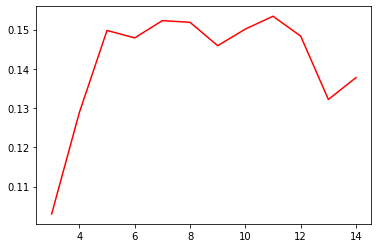

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

matrix = X.values #make matrix from DataFrame
Silhouettes = []
N=[]
for n_clusters in range(3,15):
  N.append(n_clusters)
  kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=200)
  #fit model
  kmeans.fit(matrix)
  clusters = kmeans.predict(matrix)
  #use silhouette score
  silhouette_avg = silhouette_score(matrix, clusters)
  Silhouettes.append(silhouette_avg)
  print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
plt.plot(N, Silhouettes, c='r')

## 3.9) Adjust the model
K-means can converge to local minimum, and sometimes it is usefull to run it several times to get better silhouette score. Choose treshold equal to 0.145 (or more) and achieve score better than this number. Investigate nuber of elements in clusters.

In [ ]:
# run Kmeans in loop until you get good result
silhouette_avg = -1
n_clusters = 5
while silhouette_avg < 0.147:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=200)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

pd.Series(clusters).value_counts()

For n_clusters = 5 The average silhouette_score is : 0.1497905203267311


3    1009
4     964
0     673
1     626
2     606
dtype: int64

In [ ]:
features = X.keys()
for center in kmeans.cluster_centers_:
   features_dict = {features[i]:center[i] for i in range(len(features))}
   sorted_features = sorted(features_dict.items(), key =lambda kv:(-kv[1], kv[0]))
   sorted_features = [f[0] for f in sorted_features]
   print(sorted_features[:7])

['2<.<3', 'art', 'bag', 'set', 'sign', 'pot', 'box']
['5<.<10', '.>10', 'art', 'lace', 'necklac', 'wall', 'glass']
['3<.<5', 'art', 'set', 'heart', 'pot', 'tag', 'vintag']
['1<.<2', 'art', 'set', 'heart', 'tag', 'sign', 'vintag']
['0<.<1', 'art', 'card', 'christma', 'heart', 'wrap', 'decor']


## 3.10) Plot 
Plot the [silhouette](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) scores:

In [ ]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

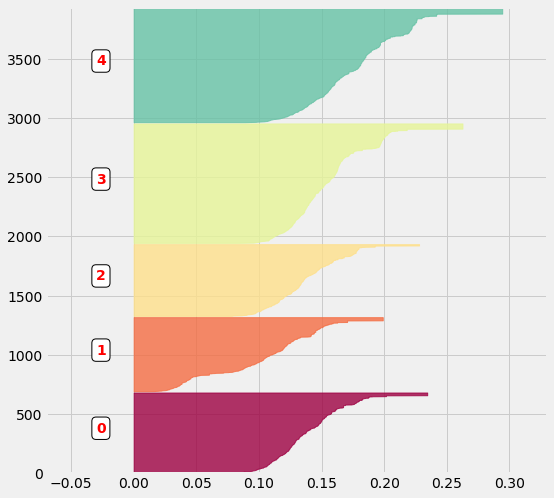

In [ ]:
from sklearn.metrics import silhouette_samples
import matplotlib as mpl
import matplotlib.cm as cm
import numpy as np

# define individual silouhette scores
sample_silhouette_values = silhouette_samples(matrix, clusters)

# and the graph
graph_component_silhouette(n_clusters, [-0.07, 0.33], len(X), sample_silhouette_values, clusters)

## 3.11) Save data
Save variables `Matrix_X.csv` and `clusters` to your google drive

In [ ]:
X.to_csv(relative_path + 'Matrix_X.csv')
(pd.Series(clusters)).to_csv(relative_path + 'Matrix_X_clusters.csv', header = 'False')